true x0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
true f: [0.         0.         0.01180732 0.02811759 0.01295502 0.
 0.         0.01207637 0.01270366 0.        ]


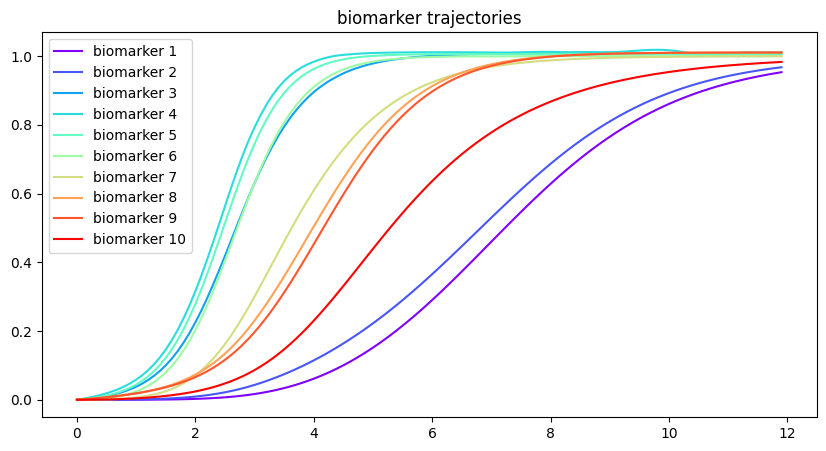

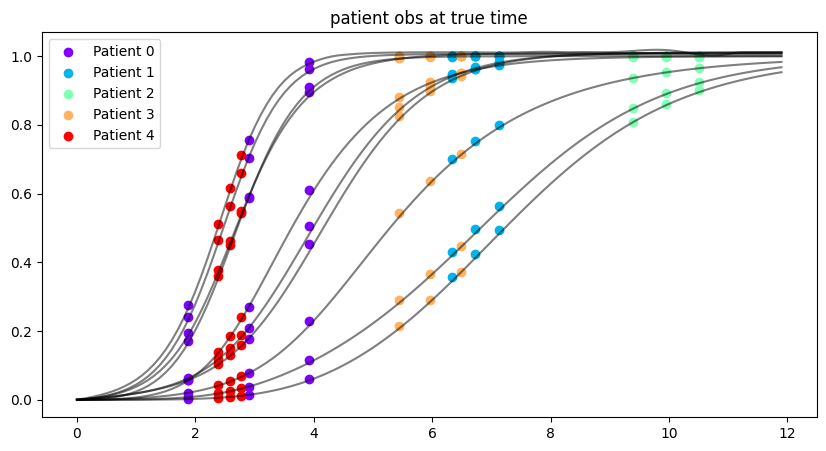

100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


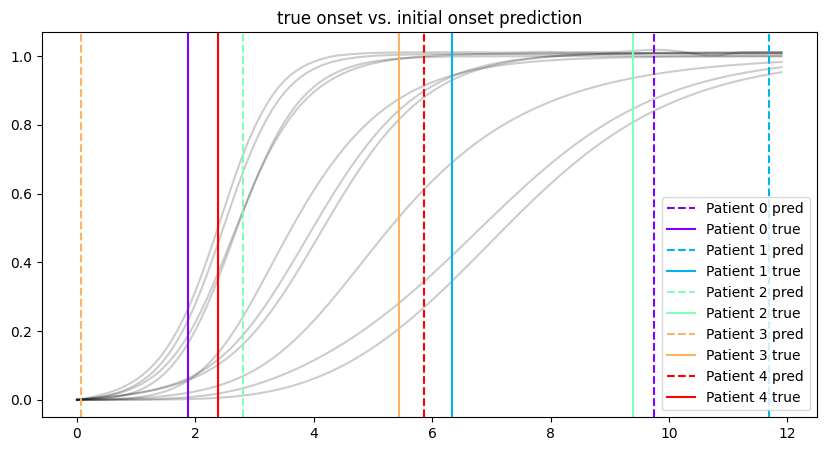

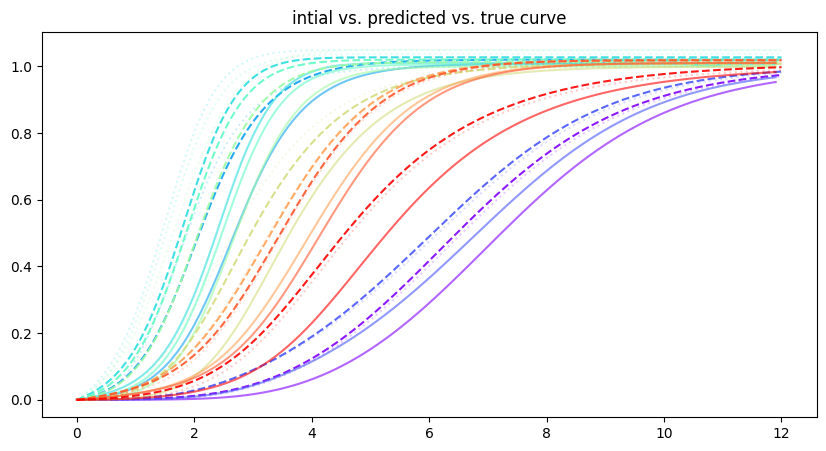

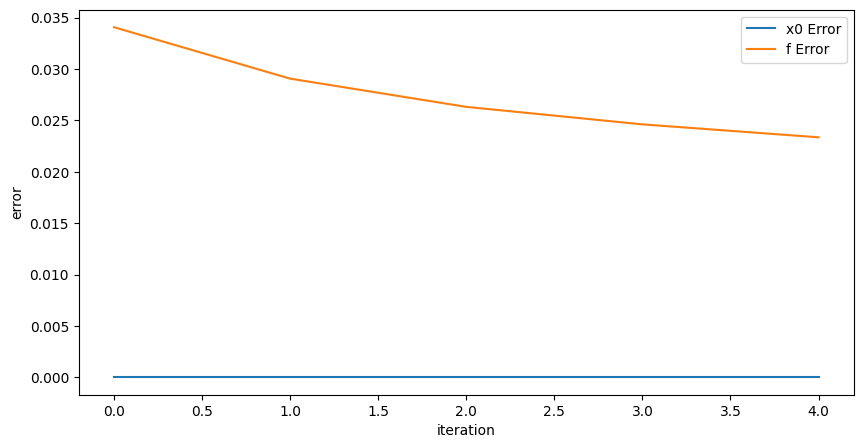

/home/dsemchin/Progression_models_simulations/EMDPM/visualization.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


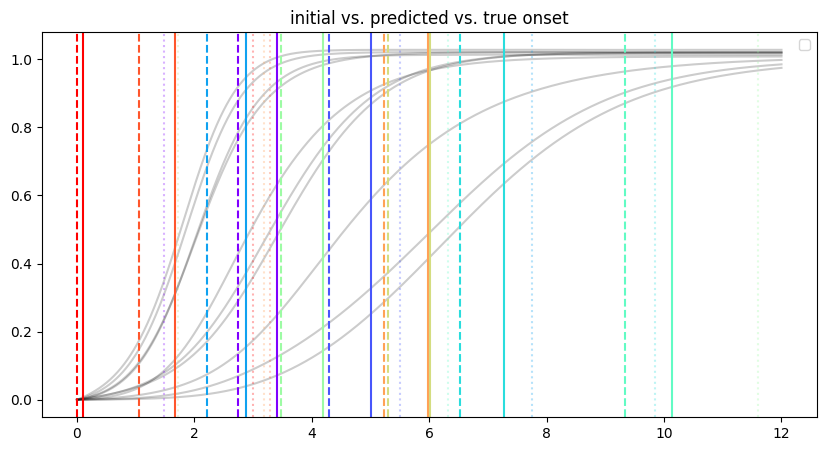

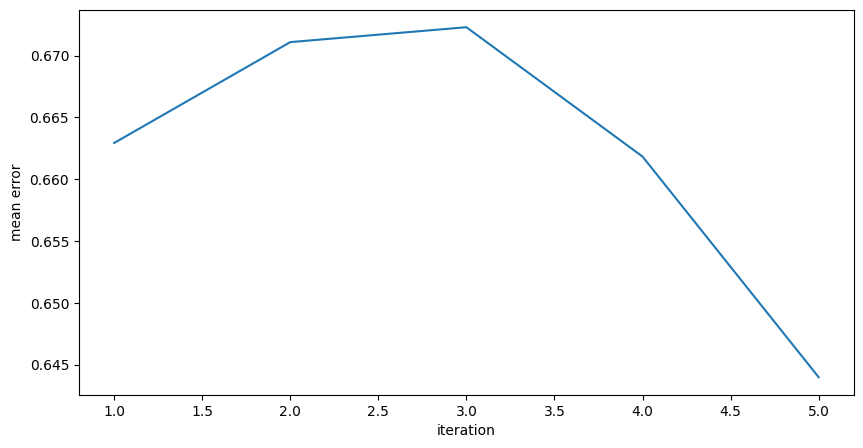

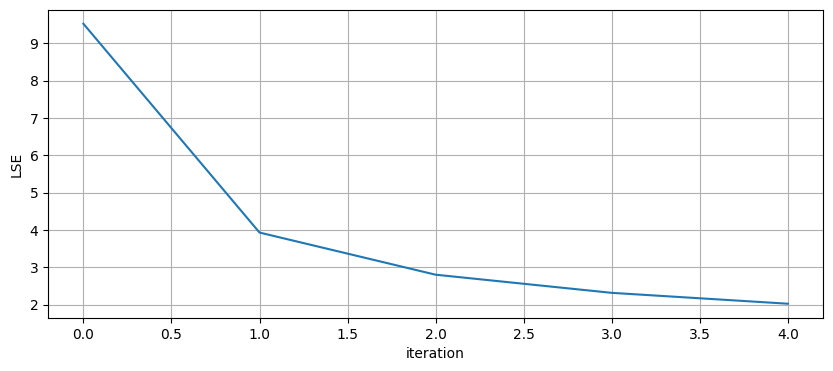

In [1]:
import numpy as np
import pandas as pd
from EMDPM.model_generator import generate_logistic_model
from EMDPM.synthetic_data_generator import generate_synthetic_data
from EMDPM.visualization import (
    plot_biomarker_trajectories,
    plot_true_observations,
    plot_initial_beta_guess,
    plot_theta_fit_comparison,
    plot_theta_error_history,
    plot_beta_overlay,
    plot_beta_error_history,
    plot_lse
)
from EMDPM.utils import solve_system
from EMDPM.em_transformer import EM

# params
n_biomarkers = 10
t_max = 12
t_span = np.linspace(0, t_max, 2000)
noise_level = 0.0
n_patients = 200
n_patient_obs = 3

# fit and transform
t, x_true, K = generate_logistic_model(n_biomarkers=n_biomarkers, t_max=t_max)

df, beta_true_dict = generate_synthetic_data(
    n_biomarkers = n_biomarkers,
    t_max = t_max, 
    noise_level = noise_level,
    n_patients = n_patients,
    n_patient_obs = n_patient_obs,
    x_true=x_true, 
    t=t
)
plot_biomarker_trajectories(t, x_true, n_biomarkers=n_biomarkers)
plot_true_observations(df, t, x_true)

em_model = EM(K=K,
              num_iterations=5,
              t_max=t_max,
              step=0.01,
              use_jacobian=False
              )

em_model.fit(df)

plot_initial_beta_guess(df, em_model.beta_iter_, t, x_true)

# Visualize final vs. initial theta fit
x0_final = em_model.theta_iter_[f"iter_{em_model.num_iterations - 1}"].values[:n_biomarkers]
f_final = em_model.theta_iter_[f"iter_{em_model.num_iterations - 1}"].values[n_biomarkers:]
x_final = solve_system(x0_final, f_final, K, t_span)

x0_init = em_model.theta_iter_["iter_0"].values[:n_biomarkers]
f_init = em_model.theta_iter_["iter_0"].values[n_biomarkers:]
x_init = solve_system(x0_init, f_init, K, t_span)

plot_theta_fit_comparison(t, t_span, x_true, x_init, x_final, n_biomarkers)
plot_theta_error_history(em_model.theta_iter_, n_biomarkers, em_model.num_iterations)
plot_beta_overlay(df, em_model.beta_iter_, em_model.theta_iter_, t_span, n_biomarkers, x_init, x_final, iteration=em_model.num_iterations - 1)
plot_beta_error_history(em_model.beta_iter_, df, em_model.num_iterations)
plot_lse(em_model.lse_array_) 

# df_transformed = em_model.transform(df)
# df_transformed.head()
